# 1. Data Preparation
   ## 1.1. Loading libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

## 1.2. Data 
* data summary

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.shape

(891, 12)

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Survived'].value_counts()    # train.groupby('Survived').size()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
train.info()

train.Cabin.dtypes
train.Cabin.value_counts()    #train['Cabin'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
C91            1
D7             1
B101           1
C110           1
C49            1
Name: Cabin, Length: 147, dtype: int64

In [6]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Meo, Mr. Alfonzo",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


* missing data

In [7]:
train.isnull().sum(axis = 0)

train = train.dropna(axis = 1, thresh = 500)

mean_age = train.Age.mean()
train.Age.fillna(mean_age, inplace = True)

most_freq = train.Embarked.value_counts(dropna = True).idxmax()
train.Embarked.fillna(most_freq, inplace = True)

print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
train.Survived = train.Survived.astype('category')
train.Pclass = train.Pclass.astype('category')
train.Embarked = train.Embarked.astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 58.7+ KB


In [9]:
count, bin_dividers = np.histogram(train.Age, bins = 8)
bin_dividers

bin_names = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
train['Age_bins'] = pd.cut(x = train['Age'],
                          bins = bin_dividers,
                          labels = bin_names,
                          include_lowest = False)

train[['Age', 'Age_bins']].head(10)

,Age,Age_bins
0,22.000000,20-30
1,38.000000,30-40
2,26.000000,20-30
3,35.000000,30-40
4,35.000000,30-40
5,29.699118,20-30
6,54.000000,50-60
7,2.000000,0-10
8,27.000000,20-30
9,14.000000,10-20


In [10]:
train.Fare = train.Fare/abs(train.Fare.max())

## 1.3. Data Visualization

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
Age_bins       890 non-null category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 60.0+ KB


['classic', 'seaborn-poster', 'dark_background', 'seaborn-ticks', 'seaborn-muted', 'seaborn-deep', 'fivethirtyeight', 'grayscale', 'seaborn-notebook', 'ggplot', 'bmh', 'seaborn-paper', 'fast', 'tableau-colorblind10', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn', 'seaborn-talk', 'seaborn-white', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-dark-palette', 'Solarize_Light2', '_classic_test', 'seaborn-darkgrid']


Text(0.5, 1.0, 'Count of Survived')

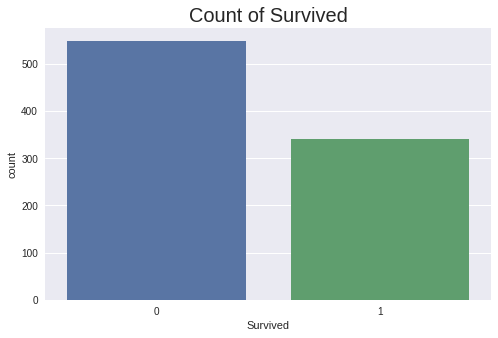

In [12]:
#train['Survived'].value_counts().plot(kind = 'bar')

#train['Survived'].value_counts().index.astype(object)
#plt.bar(train['Survived'].value_counts().index.astype(object), train['Survived'].value_counts().values)

plt.figure(figsize = (8,5))
plt.style.use('seaborn')
print(plt.style.available)
sns.countplot(x = 'Survived', data = train)
plt.title('Count of Survived', fontsize = 20)

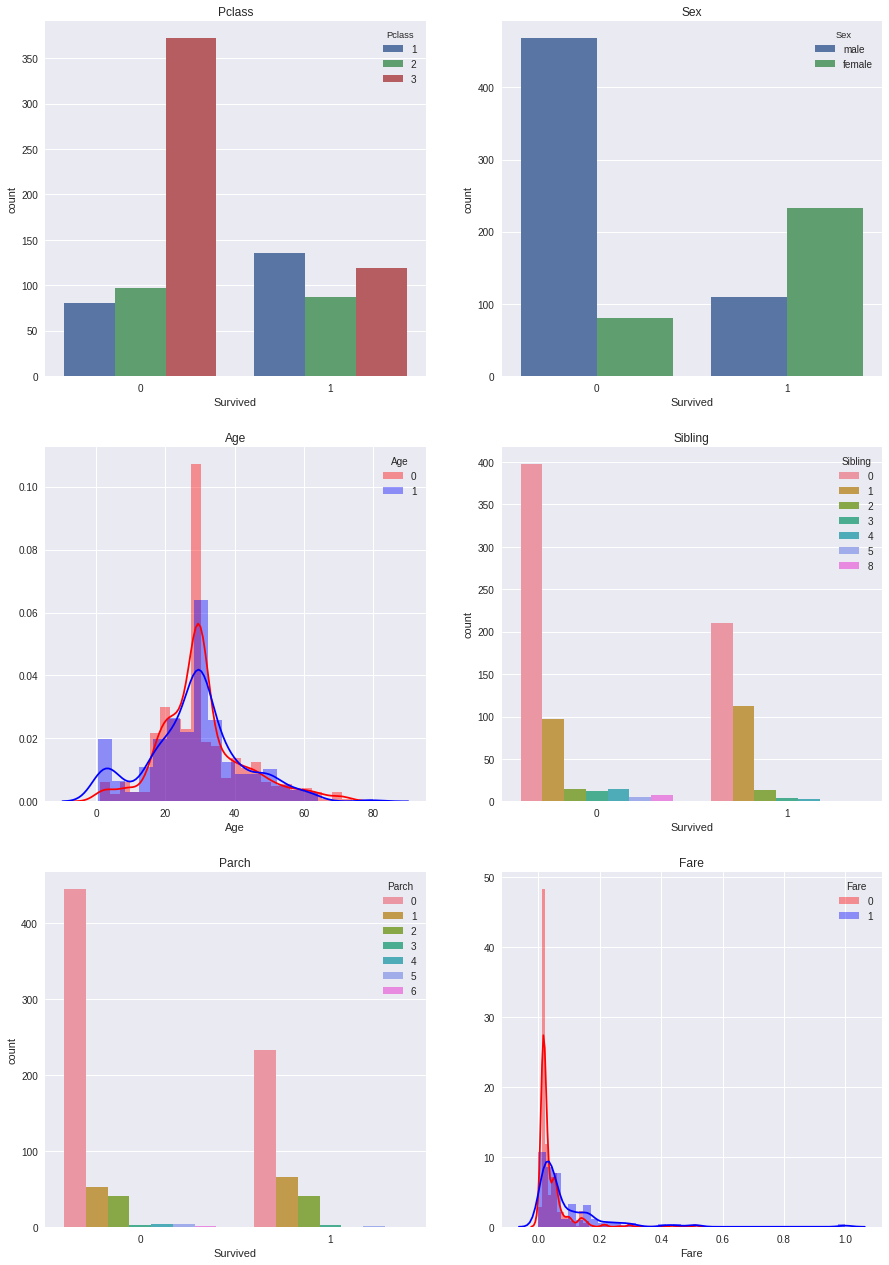

In [13]:
fig = plt.figure(figsize = (15, 30))
ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)

ax1 = sns.countplot(x = 'Survived', hue = 'Pclass', data = train, ax = ax1)
ax1.set_title('Pclass')

ax2 = sns.countplot(x = 'Survived', hue = 'Sex', data = train, ax = ax2)
ax2.set_title('Sex')

ax3 = sns.distplot(train[train['Survived'] == 0]['Age'].dropna(), color = 'red', label = '0', ax = ax3)
ax3 = sns.distplot(train[train.Survived == 1]['Age'].dropna(), color = 'blue', label = '1', ax = ax3)
ax3.set_title('Age')
ax3.legend(title = 'Age', loc = 'best')

ax4 = sns.countplot(x = 'Survived', hue = 'SibSp', data = train, ax = ax4)
ax4.set_title('Sibling')
ax4.legend(title = 'Sibling', loc = 'upper right')

ax5 = sns.countplot(x = 'Survived', hue = 'Parch', data = train, ax = ax5)
ax5.set_title('Parch')
ax5.legend(title = 'Parch', loc = 'upper right')

ax6 = sns.distplot(train[train.Survived == 0]['Fare'], color = 'red', label = '0', ax = ax6)
ax6 = sns.distplot(train[train.Survived == 1]['Fare'], color = 'blue', label = '1', ax = ax6)
ax6.set_title('Fare')
ax6.legend(title = 'Fare', loc = 'upper right')

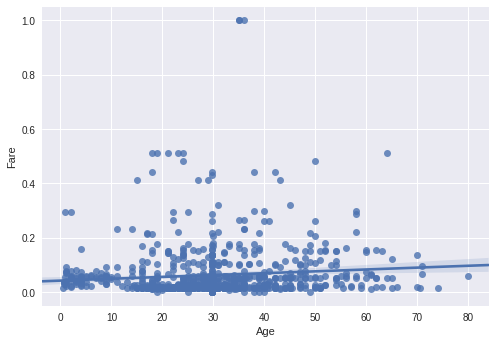

In [14]:
sns.regplot(x = 'Age', y = 'Fare', data = train)

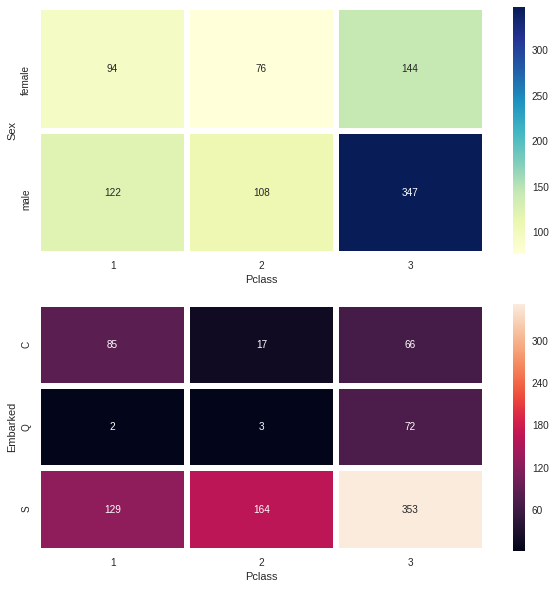

In [15]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

table = train.pivot_table(index = 'Sex', columns = 'Pclass', aggfunc = 'size')
sns.heatmap(table, annot = True, fmt = 'd', cmap = 'YlGnBu', linewidth = 5, ax = ax1)

table2 = table = train.pivot_table(index = 'Embarked', columns = 'Pclass', aggfunc = 'size')
sns.heatmap(table2, annot = True, fmt = 'd', linewidth = 5, ax = ax2)

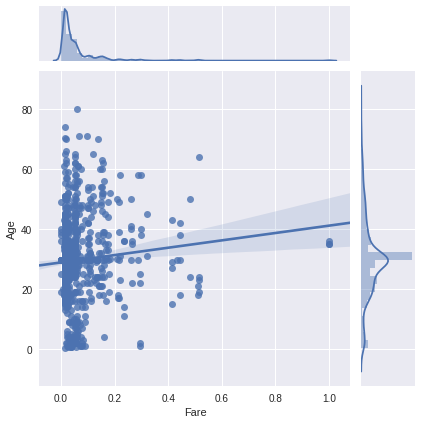

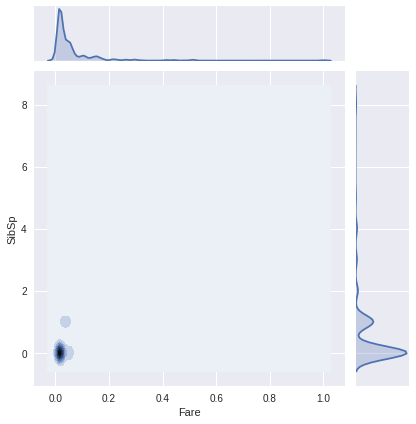

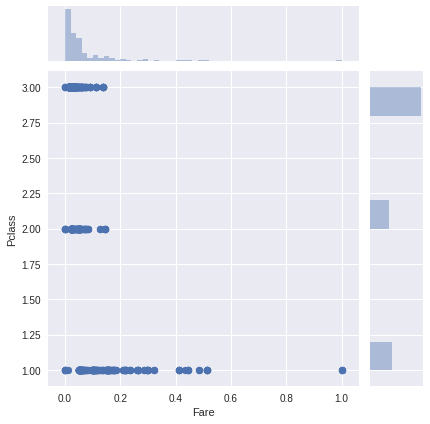

In [16]:
sns.jointplot(x = 'Fare', y = 'Age', kind = 'reg', data = train)
sns.jointplot(x = 'Fare', y = 'SibSp', kind = 'kde', data = train)
sns.jointplot(x = 'Fare', y = 'Pclass', data = train)

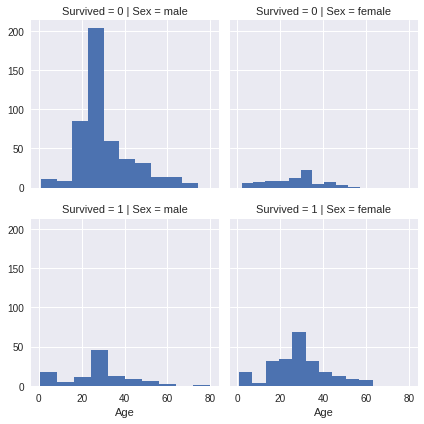

In [17]:
g = sns.FacetGrid(data = train, col = 'Sex', row = 'Survived')
g.map(plt.hist, 'Age')

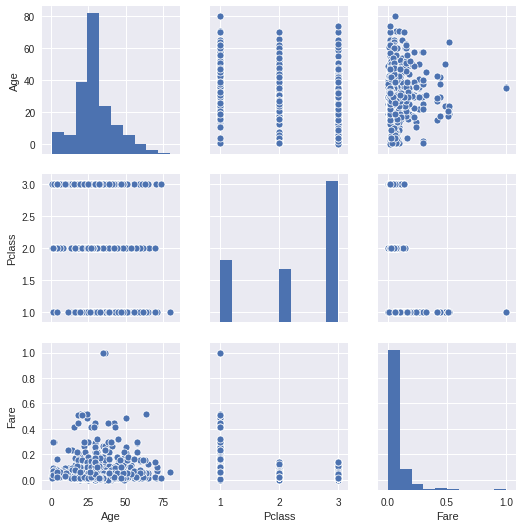

In [18]:
train_pair = train[['Age', 'Pclass', 'Fare']]
sns.pairplot(train_pair)

# 2. Modeling


In [19]:
train.head()
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train['Survived']

onehot_Pclass = pd.get_dummies(train.Pclass)
onehot_Sex = pd.get_dummies(train.Sex)
onehot_Embarked = pd.get_dummies(train.Embarked)

X = pd.concat([X, onehot_Pclass, onehot_Sex, onehot_Embarked], axis = 1)
X.drop(['Pclass', 'Sex', 'Embarked'], axis = 1, inplace = True)
X.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,0.014151,0,0,1,0,1,0,0,1
1,38.0,1,0,0.139136,1,0,0,1,0,1,0,0
2,26.0,0,0,0.015469,0,0,1,1,0,0,0,1
3,35.0,1,0,0.103644,1,0,0,1,0,0,0,1
4,35.0,0,0,0.015713,0,0,1,0,1,0,0,1


In [20]:
#from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

[[162  12]
 [ 46  48]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       174
           1       0.80      0.51      0.62        94

    accuracy                           0.78       268
   macro avg       0.79      0.72      0.74       268
weighted avg       0.79      0.78      0.77       268

